#### Uses this article as a model: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [13]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from statsmodels.tsa.arima.model import ARIMA

In [14]:
data = pd.read_csv("./Resources/Clean_Data/Final_Data.csv")

In [15]:

time_series_data = data.filter(['Zip_Code', 'Date', 'Sale_Price'], axis=1)
time_series_data.Date=pd.to_datetime(time_series_data['Date'])
zip_grouped = time_series_data.groupby(['Zip_Code'])
fl_grouped = time_series_data.groupby(['Date'], as_index=False)['Sale_Price'].mean()
fl_grouped_df = pd.DataFrame(fl_grouped)
fl_grouped_arima = fl_grouped.set_index("Date")
# groups = dict(list(grouped))

# series['Date'] = [mdates.date2num(d) for d in series['Date']]
# for key in groups.keys():
#     print(key)



In [16]:
print(fl_grouped)

         Date     Sale_Price
0  2019-01-01  210245.306713
1  2019-02-01  214338.336449
2  2019-03-01  227898.499412
3  2019-04-01  224758.485714
4  2019-05-01  230059.367463
5  2019-06-01  231869.342466
6  2019-07-01  229950.753409
7  2019-08-01  229501.079727
8  2019-09-01  225145.900685
9  2019-10-01  226576.822526
10 2019-11-01  228679.558352
11 2019-12-01  232862.233825
12 2020-01-01  228488.871591
13 2020-02-01  234580.908571
14 2020-03-01  243376.817560
15 2020-04-01  249067.509804
16 2020-05-01  244860.996560
17 2020-06-01  250534.495465
18 2020-07-01  258141.174260
19 2020-08-01  260666.296339
20 2020-09-01  258158.741714
21 2020-10-01  262404.383467
22 2020-11-01  266163.667049
23 2020-12-01  272046.747717
24 2021-01-01  267776.971297
25 2021-02-01  272949.230588
26 2021-03-01  287040.670316


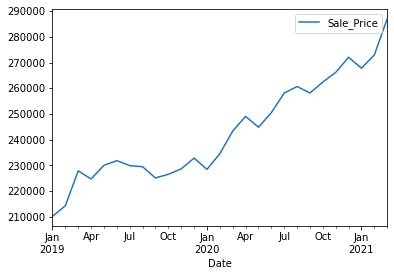

In [17]:
fl_grouped.plot(x='Date', y='Sale_Price')
plt.show()

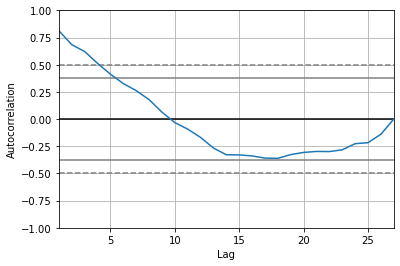

In [18]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(fl_grouped.set_index('Date'))
plt.show()

### For Florida, auto-correlation in the time series reveals probably first 4 lags are significant, so choose 4 for starting point for AR parameter of the model.


In [19]:
data=pd.Series(fl_grouped.Sale_Price.values, index=fl_grouped.Date)

C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -258.474
Date:                Thu, 03 Jun 2021   AIC                            528.947
Time:                

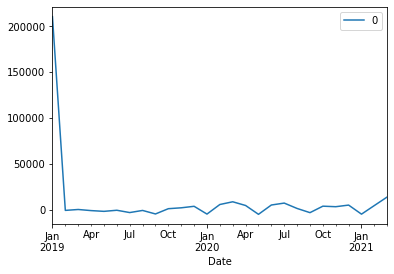

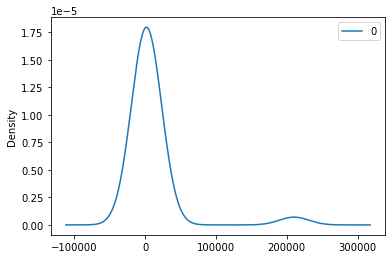

                   0
count      27.000000
mean     9555.430440
std     40369.817789
min     -4704.549424
25%     -1071.432443
50%      1655.209140
75%      5106.543928
max    210245.306713


In [20]:
# fit model
model = ARIMA(data, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [21]:
#Predict median home price for Florida based on time series
yhat=model_fit.forecast()
print(yhat)

2021-04-01    287972.772776
Freq: MS, dtype: float64


In [22]:
#Predict median home price for Florida based on time series another way
yhat_2 = model_fit.predict(start=len(data), end=len(data))
print(yhat_2)

2021-04-01    287972.772776
Freq: MS, dtype: float64


In [23]:
# Work with zip code time series

zip_grouped_df = pd.DataFrame(zip_grouped)
# zip_grouped_df[1][0]
zip_32003 = zip_grouped_df[1][0]
zip_32003


,Zip_Code,Date,Sale_Price
0,32003,2019-01-01,244950.0
1,32003,2019-02-01,270000.0
2,32003,2019-03-01,275000.0
3,32003,2019-04-01,264500.0
4,32003,2019-05-01,281000.0
5,32003,2019-06-01,275000.0
6,32003,2019-07-01,282500.0
7,32003,2019-08-01,269577.0
8,32003,2019-09-01,286000.0
9,32003,2019-10-01,258000.0


In [24]:
zip_groups = zip_grouped_df[1]
zip_group_array = []
for i in zip_groups:
    zip_group_array.append(i)
print(zip_group_array[54])

      Zip_Code       Date  Sale_Price
1310     32131 2019-01-01    148900.0
1311     32131 2019-02-01    235000.0
1312     32131 2019-03-01    184700.0
1313     32131 2019-04-01    130000.0
1314     32131 2019-05-01    161250.0
1315     32131 2019-06-01    140000.0
1316     32131 2019-07-01    113286.0
1317     32131 2019-08-01    224500.0
1318     32131 2019-09-01     90000.0
1319     32131 2019-10-01    174000.0
1320     32131 2019-11-01     60000.0
1321     32131 2019-12-01    160700.0
1322     32131 2020-01-01    106400.0
1323     32131 2020-02-01    123800.0
1324     32131 2020-03-01    211500.0
1325     32131 2020-04-01    211500.0
1326     32131 2020-05-01    155500.0
1327     32131 2020-06-01     86500.0
1328     32131 2020-07-01    199500.0
1329     32131 2020-08-01    293000.0
1330     32131 2020-09-01    140000.0
1331     32131 2020-10-01    186500.0
1332     32131 2020-11-01    162500.0
1333     32131 2020-12-01    163000.0
1334     32131 2021-01-01    182000.0
1335     321

In [25]:
reports={}
for i in zip_group_array:
    # current_group = zip_group_array[i]
    # j = current_group.Zip_Code.nunique()
    try:
        j = str(i.Zip_Code.unique().item(0))
        # print(j)
        i.drop("Zip_Code", axis=1)
        i.set_index("Date")
        data=pd.Series(i.Sale_Price.values, index=i.Date)
        # fit model
        model = ARIMA(data, order=(4,1,0))
        model_fit = model.fit()


        # summary of fit model
        # print(model_fit.summary())
        # line plot of residuals
        residuals = pd.DataFrame(model_fit.resid)
        # residuals.plot()
        # plt.show()
        # density plot of residuals
        # residuals.plot(kind='kde')
        # plt.show()
        # summary stats of residuals
        # print(residuals.describe())
        yhat=model_fit.forecast()[0]
        # print(j, yhat)
        reports[j] = yhat
    
    except:
        pass

provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\chris\anaco

In [26]:
print(reports)

': 313055.85169312137, '32317': 317710.6411239504, '32320': 158793.58288092603, '32327': 149657.66217558488, '32328': 462894.1854212289, '32333': 196179.52059494922, '32344': 141918.35786895145, '32346': 218190.71732602327, '32347': 111519.78703209767, '32348': 97647.62721812942, '32359': 135379.21224348695, '32401': 146773.66801735788, '32404': 204483.5372772054, '32405': 200419.27659544497, '32407': 278198.7851144323, '32408': 299237.976824223, '32410': 303537.4125321586, '32413': 402096.8833298691, '32425': 115162.57987979088, '32428': 281849.6810551882, '32433': 121599.6923704448, '32435': 160500.40334984142, '32438': 109422.88181513234, '32439': 317235.56491393084, '32444': 215097.91053437785, '32446': 167593.08102604648, '32448': 107767.26104378235, '32456': 376752.41759342724, '32459': 758808.9036873828, '32465': 61238.6344742849, '32466': 94611.18357345139, '32501': 226320.63196072512, '32502': 319218.0867314193, '32503': 198028.44156832507, '32504': 202089.25502906335, '32505'

In [33]:
zip_code_april_2021_preds = pd.DataFrame.from_dict(reports, orient='index')
zip_code_april_2021_preds = zip_code_april_2021_preds.reset_index()
zip_code_april_2021_preds = zip_code_april_2021_preds.rename(columns={'index':'Zip_Code',0:'ARIMA_Sales_Price'})
ARIMA_path = os.path.abspath('Resources/ML_Outputs/April_2021_preds_by_zip.csv')
zip_code_april_2021_preds.to_csv(ARIMA_path, index=False)
zip_code_april_2021_preds.head()

,Zip_Code,ARIMA_Sales_Price
0,32003,332455.527071
1,32011,251787.582929
2,32024,175045.008608
3,32025,138263.066335
4,32033,240471.399966


In [28]:
# Bins for 'high growth', 'low growth', and 'loss' groups
# growth_bins = {}
# for name, values in 

# fl_grouped = time_series_data.groupby(['Date'], as_index=False)['Sale_Price'].mean()
# fl_grouped_df = pd.DataFrame(fl_grouped)
# fl_grouped_arima = fl_grouped.set_index("Date")

In [190]:
print(len(zip_code_april_2021_preds))

763
